In [1]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import svm, naive_bayes, metrics, linear_model, ensemble
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [2]:
def load_data(tron=False):
    """
        load data
        tron=True if want to shuffle data
    """
    print("Loading data...")
    train = pd.read_excel("./data/process/train.xlsx", sheet_name="data")
    valid = pd.read_excel("./data/process/valid.xlsx", sheet_name="data")
    test = pd.read_excel("./data/process/test.xlsx", sheet_name="data")
    trainX = train["content"].tolist()
    trainY = train["label"].tolist()
    validX = valid["content"].tolist()
    validY = valid["label"].tolist()
    testX = test["content"].tolist()
    testY = test["label"].tolist()
    if tron:
        trainX, trainY = shuffle(trainX, trainY)
        validX, validY = shuffle(validX, validY)
        testX, testY = shuffle(testX, testY)
    print("Load data done!")
    print(f"Train: {len(trainX)}, Valid: {len(validX)}, Test: {len(testX)}")
    return trainX, trainY, validX, validY, testX, testY

In [3]:
trainX, trainY, validX, validY, testX, testY = load_data(tron=True)

Loading data...
Load data done!
Train: 153012, Valid: 8000, Test: 16000


In [4]:
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=50000)
tfidf_vect.fit(trainX)

TfidfVectorizer(max_features=50000)

In [5]:
X_train =tfidf_vect.transform(trainX)
X_valid = tfidf_vect.transform(validX)
X_test = tfidf_vect.transform(testX)

In [6]:
svd = TruncatedSVD(n_components=300, random_state=42)
svd.fit(X_train)

TruncatedSVD(n_components=300, random_state=42)

In [7]:
X_train = svd.transform(X_train)
X_valid = svd.transform(X_valid)
X_test = svd.transform(X_test)

In [8]:
sv = svm.SVC()
sv.fit(X_train, trainY)

SVC()

In [9]:
valid = sv.predict(X_valid)
test = sv.predict(X_test)
print("Validation accuracy: ", metrics.accuracy_score(valid, validY))
print("Test accuracy: ", metrics.accuracy_score(test, testY))

Validation accuracy:  0.919375
Test accuracy:  0.9178125


In [10]:
confu = metrics.confusion_matrix(test, testY, labels=[0, 1, 2, 3, 4, 5, 6, 7])
dis = metrics.ConfusionMatrixDisplay(confu, display_labels=[
    "chinh-tri",
    "doi-song",
    "giao-duc",
    "kinh-doanh",
    "phap-luat",
    "suc-khoe",
    "the-gioi",
    "the-thao",
])

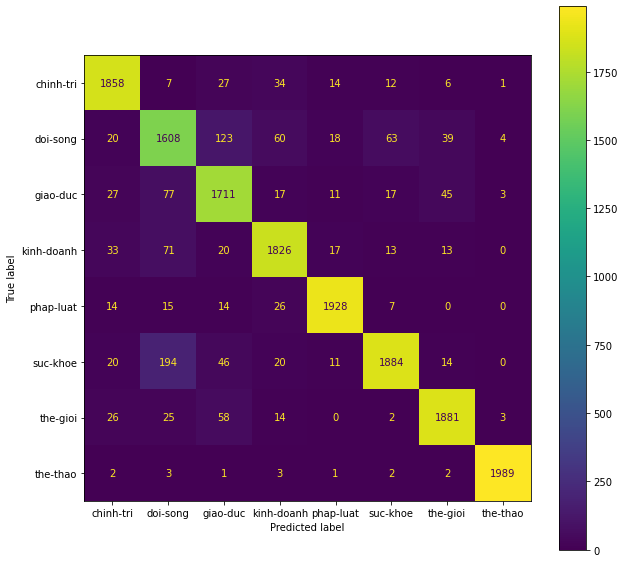

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
dis.plot(ax=ax)

In [12]:
from underthesea import word_tokenize

In [13]:
f = open("test.txt", "r", encoding="utf-8")
sent = f.readline().strip()

In [14]:
sent

'Ngày 1/2, mạng xã hội xuất hiện đoạn video ghi lại cảnh hai người lớn vào một điểm trường của Tiểu học Tân An Thạnh 2 ở huyện Bình Tân đánh hai học sinh khi các em đang chơi nhảy dây với bạn. Trong video gần hai phút, một phụ nữ chạy xe máy vào sân trường, đằng sau đèo một học sinh. Cùng lúc này, một người đàn ông đi tới túm áo một nam sinh rồi tát tới tấp vào đầu và mặt. Em này bị bắt đứng yên để nam sinh đi theo người phụ nữ tát thêm. Ông này còn đến tát vào mặt một nam sinh khác. Trong lúc đó, người phụ nữ kéo tay, khống chế các nạn nhân. Ông Trần Duy Mên, hiệu trưởng trường Tiểu học Tân An Thạnh, cho biết sự việc xảy ra lúc hơn 16h ngày 16/1 (25 Tết). Điểm trường này có bốn lớp học buổi chiều. Khi đó, học sinh đã tan học, thầy cô của trường cũng đã ra về, chỉ còn gần 10 em chơi đùa trong lúc chờ cha mẹ.'

In [15]:
x = word_tokenize(sent, format="text").lower()

In [17]:
k = [x]
m = tfidf_vect.transform(k)
n = svd.transform(m)

In [18]:
j = sv.predict(n)

In [19]:
print(j)

[2]


In [20]:
import pickle

In [36]:
with open('svm_vectorizer.pk', 'wb') as fin:
    pickle.dump(tfidf_vect, fin)

In [37]:
with open('svm_svd.p', 'wb') as fin:
    pickle.dump(svd, fin)

In [38]:
with open('svm_model.p', 'wb') as fin:
    pickle.dump(sv, fin)

In [28]:
with open('vectorizer.pk', 'rb') as fp:
    vec = pickle.load(fp)

In [29]:
with open('svd.p', 'rb') as fp:
    svd_ = pickle.load(fp)

In [30]:
with open('svm.p', 'rb') as fp:
    svm_ = pickle.load(fp)

In [31]:
f = open("test.txt", "r", encoding="utf-8")
sent = f.readline().strip()

In [32]:
sent

'Ngày 1/2, mạng xã hội xuất hiện đoạn video ghi lại cảnh hai người lớn vào một điểm trường của Tiểu học Tân An Thạnh 2 ở huyện Bình Tân đánh hai học sinh khi các em đang chơi nhảy dây với bạn. Trong video gần hai phút, một phụ nữ chạy xe máy vào sân trường, đằng sau đèo một học sinh. Cùng lúc này, một người đàn ông đi tới túm áo một nam sinh rồi tát tới tấp vào đầu và mặt. Em này bị bắt đứng yên để nam sinh đi theo người phụ nữ tát thêm. Ông này còn đến tát vào mặt một nam sinh khác. Trong lúc đó, người phụ nữ kéo tay, khống chế các nạn nhân. Ông Trần Duy Mên, hiệu trưởng trường Tiểu học Tân An Thạnh, cho biết sự việc xảy ra lúc hơn 16h ngày 16/1 (25 Tết). Điểm trường này có bốn lớp học buổi chiều. Khi đó, học sinh đã tan học, thầy cô của trường cũng đã ra về, chỉ còn gần 10 em chơi đùa trong lúc chờ cha mẹ.'

In [33]:
x = word_tokenize(sent, format="text").lower()

In [34]:
k = [x]
m = vec.transform(k)
n = svd_.transform(m)

In [35]:
j = svm_.predict(n)
j

array([2])